## Regression Task

## Multi-Variate Linear Regression

#### Importing necessary python libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

### Reading a csv dataset file into jupyter notebook using pandas library

The Melbourne Housing file has the details of houses in Melbourne from where we are going to predict the price

In [2]:
dataset = pd.read_csv('Melbourne_housing.csv') #reading the csv file

dataset.head(10) # printing the top 10 rows of the dataset

,Suburb,Rooms,Type,Landsize,BuildingArea,YearBuilt,Price
0,Abbotsford,2,h,156,79,1900,1035000
1,Abbotsford,3,h,134,150,1900,1465000
2,Abbotsford,4,h,120,142,2014,1600000
3,Abbotsford,3,h,245,210,1910,1876000
4,Abbotsford,2,h,256,107,1890,1636000
5,Abbotsford,2,h,220,75,1900,1097000
6,Abbotsford,3,h,138,105,1890,1176500
7,Abbotsford,2,h,150,73,1985,890000
8,Abbotsford,4,h,780,135,1900,1330000
9,Abbotsford,2,h,124,135,2013,1100000


### Pre-Processing

Since the dataset has two columns (Suburb and Type) as String data, we are going to convert them to integer data for the prediction. <br>
Using One Hot Encoder from the sklearn.preprocessing library to change string data into integer. <br>
It changes the first String found to 0, second to 1, third to 2 and so on.

In [3]:
lbe = LabelEncoder() #creating instance of the Label Encoder

dataset.Suburb =  lbe.fit_transform(dataset.Suburb) #changing Suburb data to integer values

dataset.Type = lbe.fit_transform(dataset.Type) #changing Type data to integer values

dataset #printing the dataset to see the String data changed to integer values

,Suburb,Rooms,Type,Landsize,BuildingArea,YearBuilt,Price
0,0,2,0,156,79,1900,1035000
1,0,3,0,134,150,1900,1465000
2,0,4,0,120,142,2014,1600000
3,0,3,0,245,210,1910,1876000
4,0,2,0,256,107,1890,1636000
...,...,...,...,...,...,...,...
94,6,3,0,296,150,1889,1939000
95,6,3,0,217,116,1888,1870000
96,6,3,0,205,116,1910,2050000
97,6,3,2,2113,14,1970,735000


Adding a bias term to the dataset.

In [4]:
dataset = pd.concat([pd.Series(1, index=dataset.index, name='Bias'), dataset], axis=1) #adding "Bias" column with 1 as the data

dataset.head() #printing the dataset after adding the bias term

,Bias,Suburb,Rooms,Type,Landsize,BuildingArea,YearBuilt,Price
0,1,0,2,0,156,79,1900,1035000
1,1,0,3,0,134,150,1900,1465000
2,1,0,4,0,120,142,2014,1600000
3,1,0,3,0,245,210,1910,1876000
4,1,0,2,0,256,107,1890,1636000


### Dividing the dataset to explanatory (X) and response variables (Y)

The explanatory variables (X) are those which explains the change in the result. They are also called the dependent variables as our prediction are dependent on the explanatory varirables. <br> 
The response variables (Y) are the result of the model (the prediction). These are dependent on the explanatory varibales. The changes in the X cause the resultant Y to change as well. <br>
And, Since this is "Multi"-Variate Linear Regression, there are going to be multiple columns in the explanatory variables which are going to be used to predict one column. 

In [5]:
X = dataset.iloc[:,:7] #setting the columns 1-7 as the explanatory variables (X)
Y = dataset.iloc[:, 7] #setting the last column as the response variable (Y)

Printing the explanatory variables

In [6]:
X 

,Bias,Suburb,Rooms,Type,Landsize,BuildingArea,YearBuilt
0,1,0,2,0,156,79,1900
1,1,0,3,0,134,150,1900
2,1,0,4,0,120,142,2014
3,1,0,3,0,245,210,1910
4,1,0,2,0,256,107,1890
...,...,...,...,...,...,...,...
94,1,6,3,0,296,150,1889
95,1,6,3,0,217,116,1888
96,1,6,3,0,205,116,1910
97,1,6,3,2,2113,14,1970


Printing the response variables

In [7]:
Y

0     1035000
1     1465000
2     1600000
3     1876000
4     1636000
       ...   
94    1939000
95    1870000
96    2050000
97     735000
98    1435000
Name: Price, Length: 99, dtype: int64

### Normalization

The normalization technique is used to bring the numeric values in the datase to a common scale. <br>
This does not change the difference in the range of values and bring all the data in a same scale without any data loss.<br>
After normalization, all the values are set between 0 and 1. <br><br>
The formula for Normalization is: 
##### X = (X - Xmin) / (Xmax - X min) <br>

In [8]:
for i in range(1, len(X.columns)): #for loop to iterate through all the columns in the dataset
    X.iloc[:, i] = (X.iloc[:, i]-np.min(X.iloc[:, i]))/(np.max(X.iloc[:, i])-np.min(X.iloc[:, i])) 
    #applying the normalization formula
    
X.head() #printing the dataset after Normalization

,Bias,Suburb,Rooms,Type,Landsize,BuildingArea,YearBuilt
0,1,0.0,0.2,0.0,0.038802,0.251938,0.147059
1,1,0.0,0.4,0.0,0.027996,0.527132,0.147059
2,1,0.0,0.6,0.0,0.021120,0.496124,0.985294
3,1,0.0,0.4,0.0,0.082515,0.759690,0.220588
4,1,0.0,0.2,0.0,0.087917,0.360465,0.073529


#### ------------------------------------- Pre-Processing Complete -----------------------------------------------

### MULTI - VARIATE LINEAR REGRESSION

Multi Variate Linear Regression is a type of linear regression where the independent and response variables are linearly dependent. <br>
As the name suggests, there are multiple explanatory variables which affect the output (response variable).<br>
Moreover, there are also multiple response variables which come in variation in every iteration. <br><br>

The formula for Multi Variate Linear Regression is: 

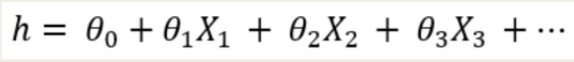

Here, h is the response varaible and theta0, theta1, theta2.... are the bias terms which are to be altered in every iterations so that h - the response variable and y - the actual value are nearly equal. <br>


We can find the difference between y and h using the Cost Function/Loss Function which calculates the MSE (Mean Squared Error) / MAE (Mean Absolute Error) / RMSE (Root Mean Squared Error). <br><br>
The forumla for Cost Function/Loss Function is [This computes the Root Mean Squared Error (RMSE)] :

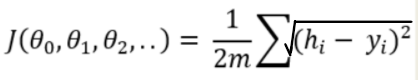

We can start with any value of theta to and then change it in every iteration. To lessen the difference between y and h, we need to optimize the theta. <br><br>
The formula for optimization of the value of theta is: 

<b>Partial differentiation</b> of the values of theta:

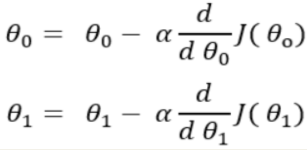

The <b>result of partial differention</b> of value of theta is: 

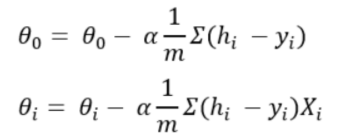

Here, the <b>Alpha</b> is the <b>learning rate</b>.<br>
The learning rate is a step value of the for each iteration to in the gradient descent algorithm to get to the minimum loss function value. <br>
Usually, it is set between 0 and 1. The value should be taken in such a way that the minimum point can be reached in minimum iterations possible. <br>
If the Alpha value is too less, it takes many steps to reach the minimum point. <br>
While, if the Alpha value id too big, the minimum value may get skipped and hence the iterations are going to be more.

##### Setting the value of theta

Here, initial values of theta for all the columns is set to 0. 

In [9]:
theta = np.array([0]*len(X.columns))

##### Finding the length of the dataset (m) to be used in the formulas

In [10]:
m = len(dataset) #using len function to find the length of the dataset

##### Making the hypothesis function 

The hypothesis function returns the product of theta and the X value which later is summed up to get the Y value in each iteration

In [11]:
def hypothesis(theta, X):
    return theta*X

##### The Loss Function to calculate the accuracy in each iteration

Here,the loss function calculates the Root Mean Squared Error (RMSE) 

In [12]:
# Parameters: X is the explanatory variables, theta is the bias term, Y is the actual value
def loss_function(X, Y, theta): 
    
    h = hypothesis(theta, X) # first finds the product of every X and theta values
    
    h = np.sum(h, axis=1) #sums them up to get the predicted Y value (hypothesis value) in each iteration
    
    return sum(np.sqrt((h-Y)**2))/(2*m) #returns the RMSE by applying formula

##### The Gradient Descent Algorithm which adjusts the values of theta in every iteration

In [13]:
# Parameters: X - explanatory variables, y - the actual value, alpha - learning rate, i - number of iterations
def gradientDescent(X, y, theta, alpha, i):
    
    J = []  #array to store the loss function values in each iteration to plot later
    
    k = 0 #the iteration count
    
    while k < i:         
        
        h = hypothesis(theta, X) # getting the product of theta and X to predict the response variable h
        
        h = np.sum(h, axis=1) # the response variable h in each iteration
        
        for c in range(0, len(X.columns)): # to optimize the value of theta for all the X values
            
            theta[c] = theta[c] - alpha*(sum((h-y)*X.iloc[:,c])/len(X)) # applying theta optimization formula
            
        j = loss_function(X, y, theta) # calculating the loss function
        
        J.append(j) # storing the loss function 
        
        k += 1 
        
    return J, j, theta # retuns the loss function values and the optimized theta value

##### Splitting the dataset into train and test data

In [14]:
# putting 70% the dataset into train data and the other 30% into test data with random state 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.6,random_state=42)

In [15]:
X_test.shape # looking at how many rows and columns the testing set has to later plot that many points of the testing data

(40, 7)

##### Applying the Gradient Descent Algorithm with the training dataset with learning rate 0.05 and 5000 iterations

In [27]:
J, j, theta = gradientDescent(X_train, Y_train, theta, 0.01, 100000)

##### Getting the predicted Y values 

In [28]:
y_pred = hypothesis(theta, X_test) # getting the product of X and theta values
y_pred = np.sum(y_pred, axis=1) # summing all the products to get the predicted Y value

##### Plotting the actual and predicted Y values for the testing data using matplotlib

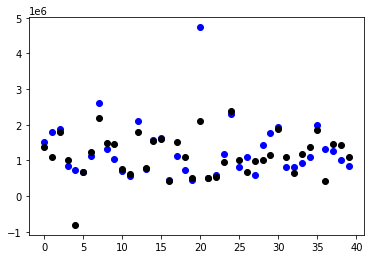

In [29]:
%matplotlib inline

plt.figure()
plt.scatter(x=list(range(0, 40)),y = Y_test, color='blue') # plotting the actual values in blue    
plt.scatter(x=list(range(0, 40)),y = y_pred, color='black') # plotting the predicted values in black
plt.show()

##### Plotting the loss function values in each iteration

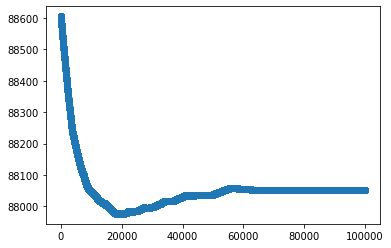

In [31]:
plt.figure()
plt.scatter(x=list(range(0, 100000)), y=J)
plt.show()

##### From the above graph, we can see that the loss function has decreased in every iteration. 

In [32]:
r2_score(Y_test, y_pred)

0.45391934156660385

##### The R-sqaured value of the model is   i.e. the model predicts the output with  % accuracy.
##### Therefore, the Multi-Variate Linear Regression model is a good one.